In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('googleplaystore.csv.zip')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.size

140933

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

np.int64(483)

In [7]:
data.drop_duplicates(inplace= True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [11]:
data.fillna(0, inplace= True)

In [12]:
data = data.drop(columns=['Current Ver', 'Android Ver'])

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [14]:
# data = data[data['Installs'].str.contains(r'^\d+[+,]*$', na=False)]
# data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [15]:
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)  # remove commas and plus
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')    # then convert to float


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
dtypes: float64(2), object(9)
memory usage: 971.1+ KB


In [17]:
x = data[['Rating', 'Reviews', 'Size', 'Price', 'Category', 'Type', 'Content Rating']]
x= pd.get_dummies(x, drop_first=True)

y = (data['Installs'] > 1_000_000).astype(int)


In [18]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred= model.predict(x_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


print(cm)
print(f"accuracy:{ accuracy *100:.2f}%")
print(f"precision:{ precision *100:.2f}%")
print(f"recall:{ recall *100:.2f}%")


[[6014  214]
 [1404  654]]
accuracy:80.47%
precision:78.21%
recall:64.17%


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

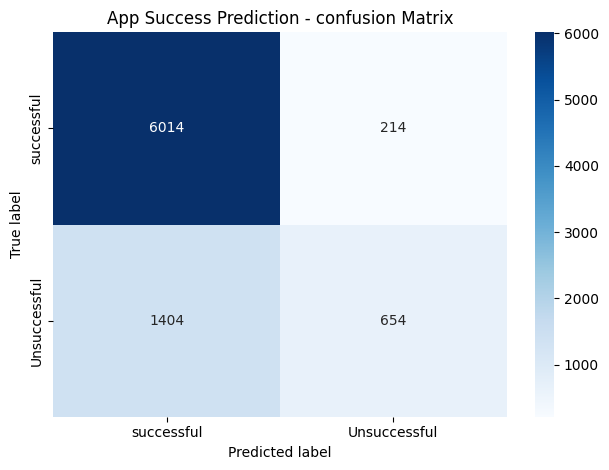

In [23]:
sns.heatmap(cm, annot= True, fmt= 'd',cmap='Blues',
        xticklabels=['successful','Unsuccessful'],
        yticklabels=['successful','Unsuccessful'])
plt.title('App Success Prediction - confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [24]:


model =  LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred= model.predict(x_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


print(cm)
print(f"accuracy:{ accuracy *100:.2f}%")
print(f"precision:{ precision *100:.2f}%")
print(f"recall:{ recall *100:.2f}%")

[[5773  455]
 [1084  974]]
accuracy:81.43%
precision:76.18%
recall:70.01%


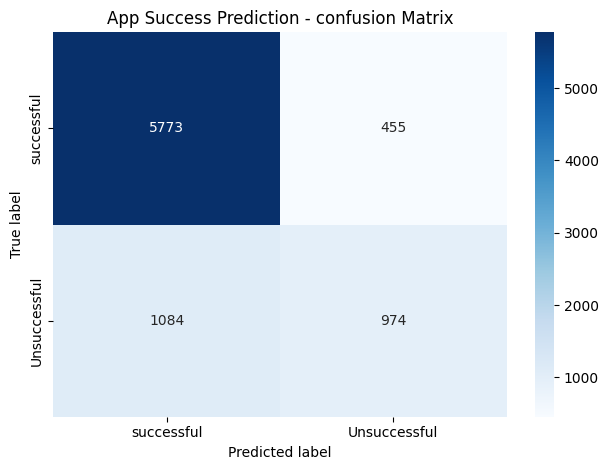

In [27]:
sns.heatmap(cm, annot= True, fmt= 'd',cmap='Blues',
        xticklabels=['successful','Unsuccessful'],
        yticklabels=['successful', 'Unsuccessful'])
plt.title('App Success Prediction - confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## CONCLUSIONS
1. Logistic Regression showed better recall, meaning it caught more actual successful apps (fewer false negatives).

2. Random Forest had better precision, meaning it made more reliable predictions when classifying an app as successful (fewer false positives).

3. Both models had solid performance.